In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'
df = pd.read_csv(url, skiprows=lambda num: num < 34 or num ==35, sep='\t')

/tmp/ipykernel_34564/2235543404.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=lambda num: num < 34 or num ==35, sep='\t')


In [26]:
def to_america_denver_time(df_, time_col, tz_col):
    return ( df_
            .assign(**{tz_col: df_[tz_col].replace('MDT','MST7MDT')})
            .groupby(tz_col)
            [time_col]
            .transform(lambda s: pd.to_datetime(s)
            .dt.tz_localize(s.name, ambiguous=True)
            .dt.tz_convert('America/Denver'))
    )

In [27]:
def tweak_river(df_):
    return (
        df_.assign(datetime=to_america_denver_time(df_, 'datetime','tz_cd'))
        .rename(columns={'144166_00060':'cfs', '144167_0065':'gage_height'})
        .set_index('datetime')
    )

In [28]:
dd = tweak_river(df)

In [29]:
dd.head(5)

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,144167_00065,144167_00065_cd
datetime,,,,,,,
2001-05-07 01:00:00-06:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:15:00-06:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:30:00-06:00,USGS,9333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 01:45:00-06:00,USGS,9333500,MDT,70.0,A:[91],NaN,NaN
2001-05-07 02:00:00-06:00,USGS,9333500,MDT,70.0,A:[91],NaN,NaN


<Axes: xlabel='datetime'>

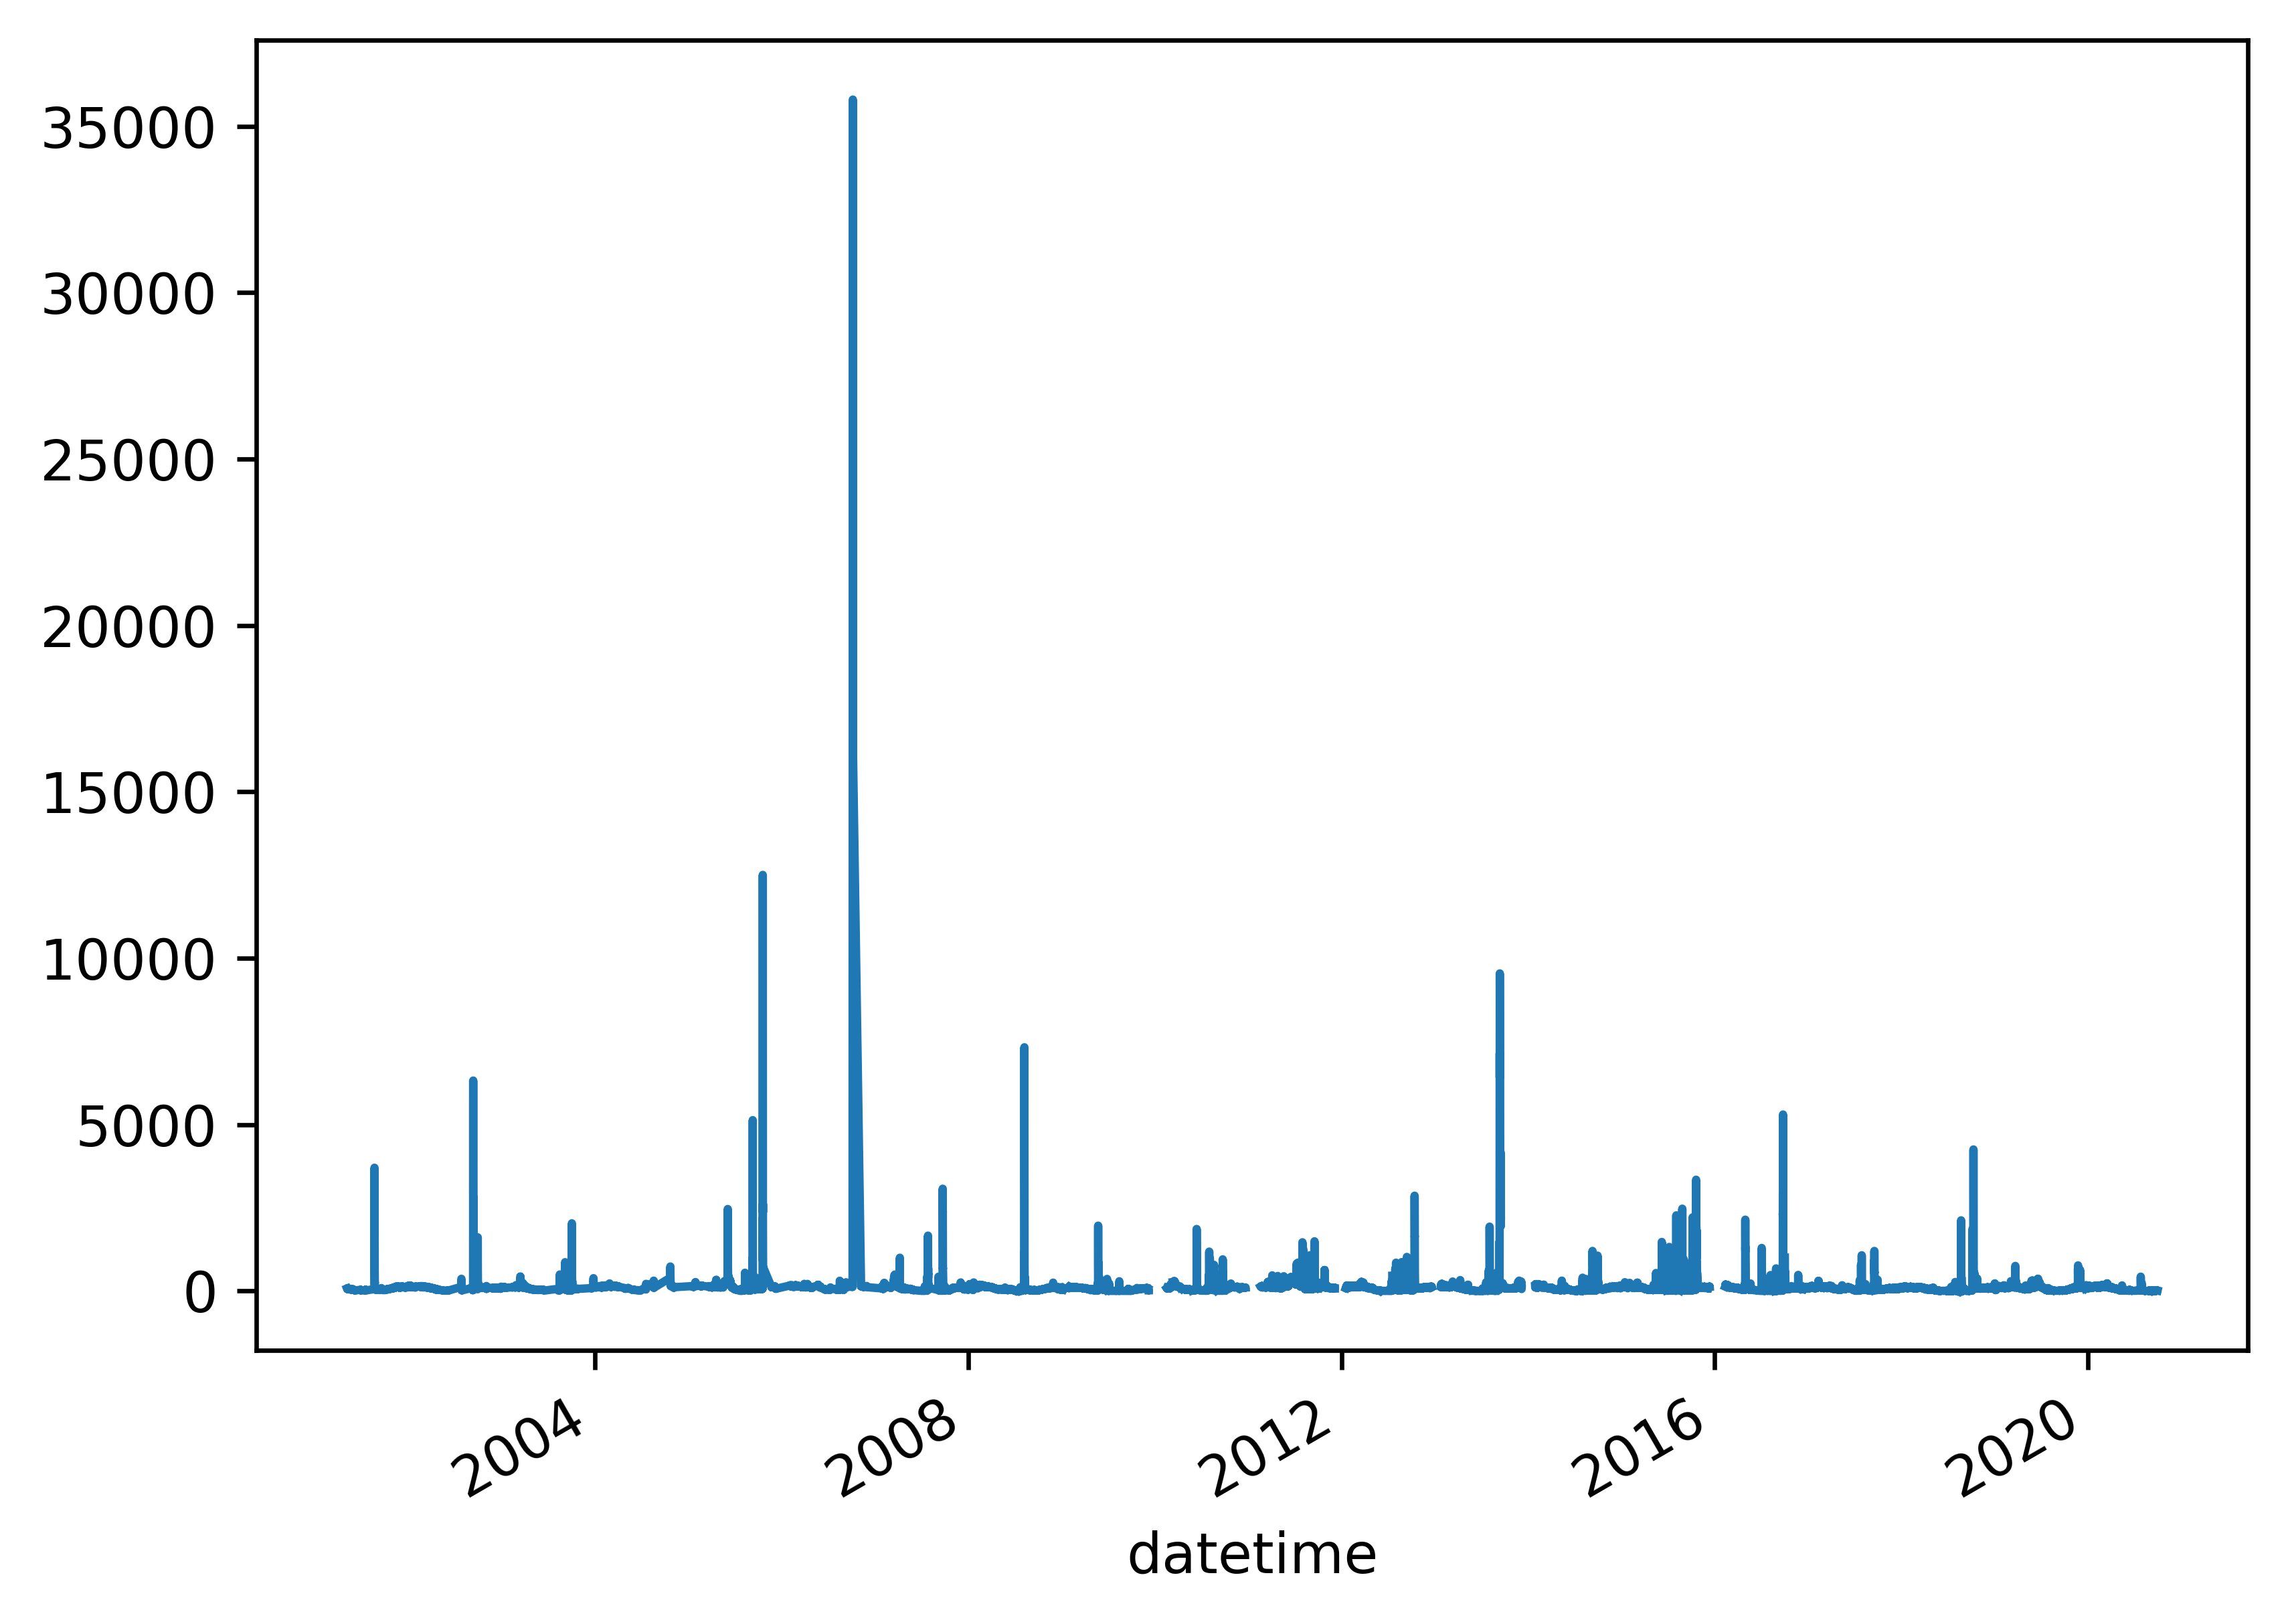

In [30]:
fig, ax = plt.subplots(dpi=600)
dd.cfs.plot()

### Slicing timeseries data

<Axes: xlabel='datetime'>

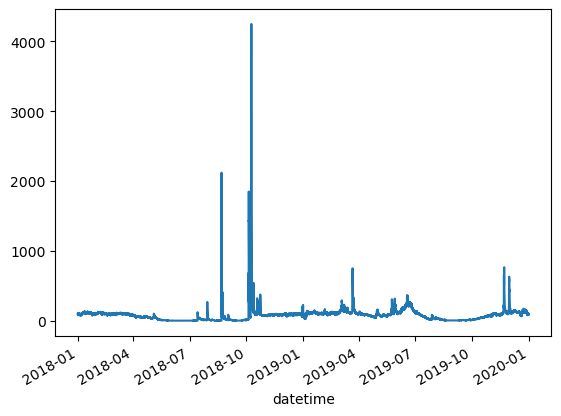

In [38]:
dd.sort_index().cfs.loc['2018':'2019'].plot()

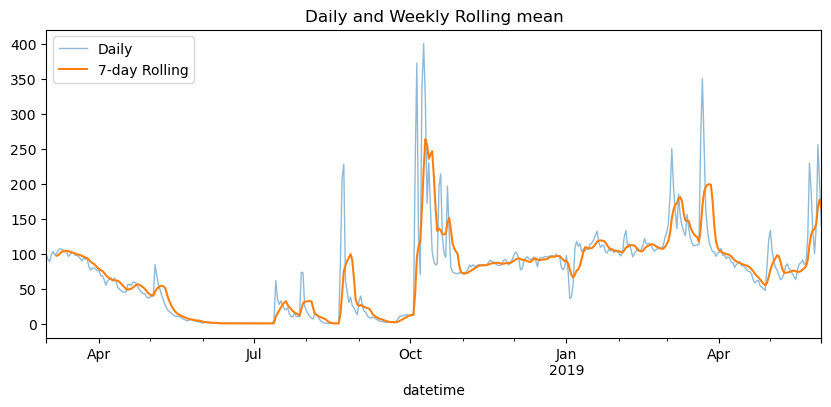

In [44]:
dd2018 = (dd.sort_index().cfs.loc['2018/3': '2019/5'].clip(upper=400))
ax = (dd2018.resample('D').mean().plot(figsize=(10,4), alpha=0.5, linewidth=1, label='Daily'))
ax = (dd2018.resample('D').mean().rolling(7).mean().plot(figsize=(10,4),ax=ax,label='7-day Rolling'))
ax.legend()
ax.set_title("Daily and Weekly Rolling mean")
plt.show()